In [1]:
import numpy as np
import meep as mp
import matplotlib.pyplot as plt
import json

In [8]:
alphawave_signal = np.loadtxt("alphawave.csv")

with open("config.json") as f:
    config = json.load(f)
    
fs = config["samplerate_hz"]
duration = config["duration_sec"] 

In [28]:
# Meep uses wacky normalized units where c=1 so we gotta do this stuff
# To get a sim of a relevant area (1 square meter) we create a geometry based on characteristic distance
# Starting from characteristic distance a = .1 m
c = 2.998e8 # speed of light in m/s
a = .1 # desired conversion of meep units to m
b = a/c # calculated meep time step
n_timesteps = round(duration/b)
# and whoops this is impossible as the time stepps are too many awesome
n_timesteps

2998000000

In [4]:
def alphawave(t):
    
    # we convert this meep time into seconds
    time = b*t
    
    
    sample = round(time*fs)
    return complex(alphawave_signal[sample])


In [5]:
# Sensor Positions in meters
sensor_xpos = np.array(config["sensor_xpos"])
sensor_ypos = np.array(config["sensor_ypos"])
max(sensor_xpos), max(sensor_ypos)

(0.5, 0.5)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00121522 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 100
time for set_epsilon = 1.35096 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20.0)

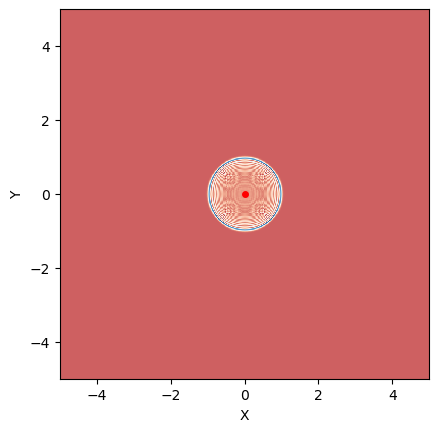

Meep progress: 1.185/20.0 = 5.9% done in 4.0s, 63.6s to go
on time step 237 (time=1.185), 0.016884 s/step
Meep progress: 2.865/20.0 = 14.3% done in 8.0s, 48.0s to go
on time step 573 (time=2.865), 0.0119337 s/step
Meep progress: 4.36/20.0 = 21.8% done in 12.0s, 43.1s to go
on time step 872 (time=4.36), 0.0133972 s/step
Meep progress: 5.885/20.0 = 29.4% done in 16.0s, 38.4s to go
on time step 1177 (time=5.885), 0.013119 s/step
Meep progress: 7.32/20.0 = 36.6% done in 20.0s, 34.7s to go
on time step 1464 (time=7.32), 0.0139518 s/step
Meep progress: 9.0/20.0 = 45.0% done in 24.3s, 29.7s to go
on time step 1800 (time=9), 0.0126999 s/step
Meep progress: 10.755/20.0 = 53.8% done in 28.3s, 24.3s to go
on time step 2151 (time=10.755), 0.0114182 s/step
Meep progress: 12.31/20.0 = 61.5% done in 32.3s, 20.2s to go
on time step 2462 (time=12.31), 0.0128662 s/step
Meep progress: 13.985/20.0 = 69.9% done in 36.3s, 15.6s to go
on time step 2797 (time=13.985), 0.0119614 s/step
Meep progress: 15.295/20

In [27]:
cell = mp.Vector3(10,10,0)
geometry = []
sources = [mp.Source(mp.CustomSource(alphawave, end_time=n_timesteps),component=mp.Bz,center=mp.Vector3(0,0)), ]
pml_layers = [mp.PML(1.0)]

resolution = 100
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
animate = mp.Animate2D(fields=mp.Bz,
                       realtime=True,
                       field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'none'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0})
sim.run(mp.at_every(1,animate),until=20);
animate.to_jshtml(fps = 1000)
